In [1]:
import cv2
import matplotlib.pyplot as plt

In [2]:
# Input image
image = cv2.imread('/content/drive/MyDrive/barbra.jpg')
image = cv2.resize(image, (510, 510))

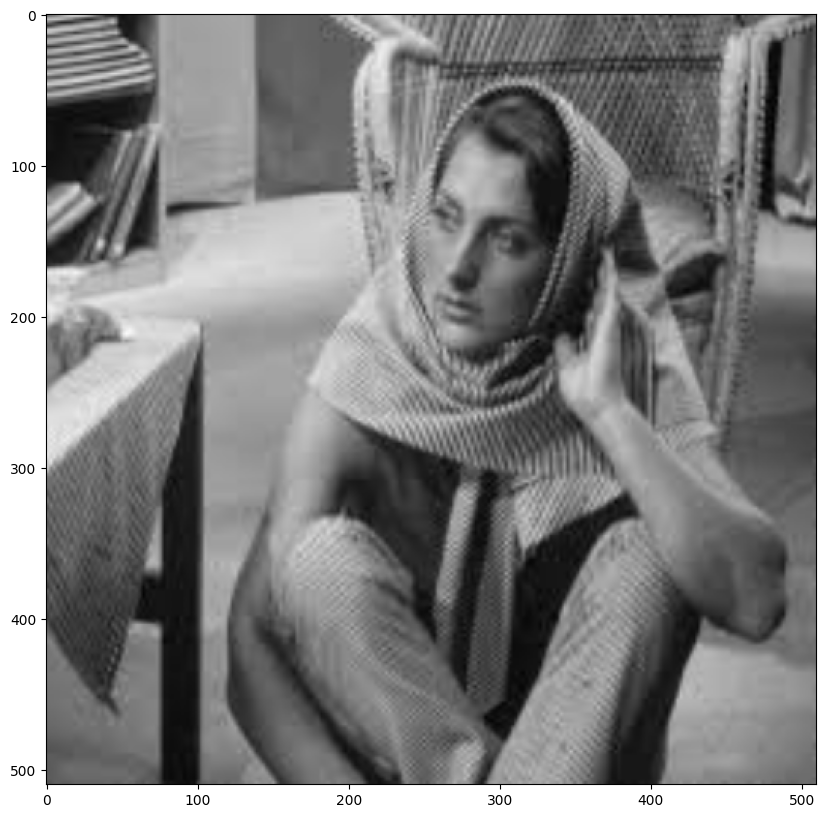

In [3]:
plt.figure(figsize=(10,10))
plt.imshow(image)
plt.show()

In [4]:
# Importing Models and set mean values
face1 = "/content/drive/MyDrive/opencv_face_detector.pbtxt"
face2 = "/content/drive/MyDrive/opencv_face_detector_uint8.pb"
age1 = "/content/drive/MyDrive/age_deploy.prototxt"
age2 = "/content/drive/MyDrive/age_net.caffemodel"
gen1 = "/content/drive/MyDrive/gender_deploy.prototxt"
gen2 = "/content/drive/MyDrive/gender_net.caffemodel"

MODEL_MEAN_VALUES = (78.4263377603, 87.7689143744, 114.895847746)


In [5]:
# Using models
# Face
face = cv2.dnn.readNet(face1, face2)

# age
age = cv2.dnn.readNet(age2, age1)

# gender
gen = cv2.dnn.readNet(gen2, gen1)

In [6]:
# Categories of distribution
la = ['(0-2)', '(4-6)', '(8-12)', '(15-20)',
      '(25-32)', '(38-43)', '(48-53)', '(60-100)']
lg = ['Male','Female']


In [7]:
# Copy image
fr_cv = image.copy()

In [8]:
# Face detection
fr_h = fr_cv.shape[0]
fr_w = fr_cv.shape[1]
blob = cv2.dnn.blobFromImage(fr_cv, 1.0, (300, 300),
                             [104, 117, 123], True, False)

face.setInput(blob)
detections = face.forward()

In [9]:
# Face bounding box creation
faceBoxes = []
for i in range(detections.shape[2]):

    #Bounding box creation if confidence > 0.7
    confidence = detections[0, 0, i, 2]
    if confidence > 0.7:

        x1 = int(detections[0, 0, i, 3]*fr_w)
        y1 = int(detections[0, 0, i, 4]*fr_h)
        x2 = int(detections[0, 0, i, 5]*fr_w)
        y2 = int(detections[0, 0, i, 6]*fr_h)

        faceBoxes.append([x1, y1, x2, y2])

        cv2.rectangle(fr_cv, (x1, y1), (x2, y2),
                      (0, 255, 0), int(round(fr_h/150)), 8)

faceBoxes


[[246, 82, 334, 224]]

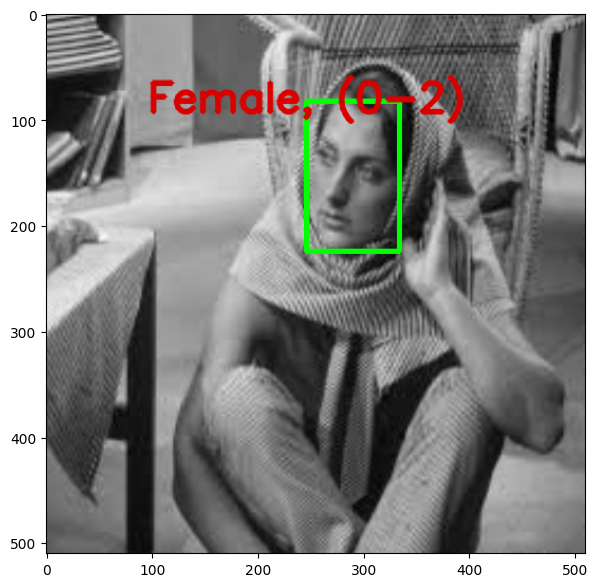

In [10]:
# Checking if face detected or not
if not faceBoxes:
    print("No face detected")

# Final results (otherwise)
# Loop for all the faces detected
for faceBox in faceBoxes:

    #Extracting face as per the faceBox
    face = fr_cv[max(0, faceBox[1]-15):
                 min(faceBox[3]+15, fr_cv.shape[0]-1),
                 max(0, faceBox[0]-15):min(faceBox[2]+15,
                               fr_cv.shape[1]-1)]

    #Extracting the main blob part
    blob = cv2.dnn.blobFromImage(
        face, 1.0, (227, 227), MODEL_MEAN_VALUES, swapRB=False)

    #Prediction of gender
    gen.setInput(blob)
    genderPreds = gen.forward()
    gender = lg[genderPreds[0].argmax()]

    #Prediction of age
    age.setInput(blob)
    agePreds = age.forward()
    age = la[agePreds[0].argmax()]

    #Putting text of age and gender
    #At the top of box
    cv2.putText(fr_cv,
                f'{gender}, {age}',
                (faceBox[0]-150, faceBox[1]+10),
                cv2.FONT_HERSHEY_SIMPLEX,
                1.3,
                (217, 0, 0),
                4,
                cv2.LINE_AA)

    plt.figure(figsize=(7, 7))
    plt.imshow(fr_cv)


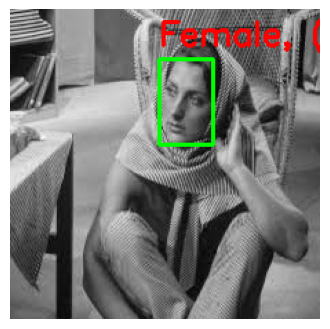

In [11]:
import cv2
import matplotlib.pyplot as plt

# Load Face, Age, and Gender Models
# Importing Models and set mean values
face1 = "/content/drive/MyDrive/opencv_face_detector.pbtxt"
face2 = "/content/drive/MyDrive/opencv_face_detector_uint8.pb"
age1 = "/content/drive/MyDrive/age_deploy.prototxt"
age2 = "/content/drive/MyDrive/age_net.caffemodel"
gen1 = "/content/drive/MyDrive/gender_deploy.prototxt"
gen2 = "/content/drive/MyDrive/gender_net.caffemodel"


# Mean values for age & gender models
MODEL_MEAN_VALUES = (78.4263377603, 87.7689143744, 114.895847746)

# Load models
faceNet = cv2.dnn.readNet(face1, face2)
ageNet = cv2.dnn.readNet(age1, age2)
genderNet = cv2.dnn.readNet(gen1, gen2)

# Labels
ageLabels = ['(0-2)', '(4-6)', '(8-12)', '(15-20)', '(25-32)', '(38-43)', '(48-53)', '(60-100)']
genderLabels = ['Male', 'Female']

# Load image
image = cv2.imread("/content/drive/MyDrive/barbra.jpg")
fr_cv = image.copy()
fr_h, fr_w = fr_cv.shape[:2]

# Face detection
blob = cv2.dnn.blobFromImage(fr_cv, 1.0, (300, 300), (104, 117, 123), swapRB=False, crop=False)
faceNet.setInput(blob)
detections = faceNet.forward()

faceBoxes = []
for i in range(detections.shape[2]):
    confidence = detections[0, 0, i, 2]
    if confidence > 0.7:
        x1 = int(detections[0, 0, i, 3] * fr_w)
        y1 = int(detections[0, 0, i, 4] * fr_h)
        x2 = int(detections[0, 0, i, 5] * fr_w)
        y2 = int(detections[0, 0, i, 6] * fr_h)

        # Ensure coordinates are within bounds
        x1, y1, x2, y2 = max(0, x1), max(0, y1), min(fr_w-1, x2), min(fr_h-1, y2)

        faceBoxes.append([x1, y1, x2, y2])
        cv2.rectangle(fr_cv, (x1, y1), (x2, y2), (0, 255, 0), 2)

# If no faces detected
if not faceBoxes:
    print("No face detected")
else:
    for faceBox in faceBoxes:
        x1, y1, x2, y2 = faceBox
        faceCrop = fr_cv[y1:y2, x1:x2]

        # Ensure valid face crop
        if faceCrop.shape[0] == 0 or faceCrop.shape[1] == 0:
            continue

        # Resize face
        faceCrop = cv2.resize(faceCrop, (227, 227))

        # Prepare blob
        blob = cv2.dnn.blobFromImage(faceCrop, 1.0, (227, 227), MODEL_MEAN_VALUES, swapRB=False)

        # Predict gender
        genderNet.setInput(blob)
        genderPreds = genderNet.forward()
        gender = genderLabels[genderPreds[0].argmax()]

        # Predict age
        ageNet.setInput(blob)
        agePreds = ageNet.forward()
        age = ageLabels[agePreds[0].argmax()]

        # Add text label
        label = f"{gender}, {age}"
        cv2.putText(fr_cv, label, (x1, y1 - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.8, (0, 0, 255), 2)

# Show output
plt.figure(figsize=(4, 5))
plt.imshow(cv2.cvtColor(fr_cv, cv2.COLOR_BGR2RGB))
plt.axis("off")
plt.show()


Gender Confidence: [0.00300171 0.9969983 ]
Age Confidence: [1.2667127e-07 1.8945207e-06 9.4162606e-05 2.5789805e-05 9.9978393e-01
 5.9763050e-05 2.9354202e-05 5.0887274e-06]
Predicted Gender: Female, Predicted Age: (25-32)


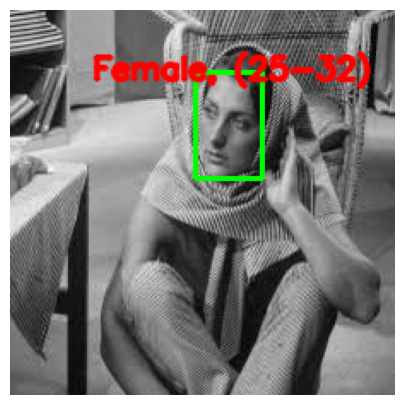

In [20]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Importing Models and setting mean values
face1 = "/content/drive/MyDrive/opencv_face_detector.pbtxt"
face2 = "/content/drive/MyDrive/opencv_face_detector_uint8.pb"
age1 = "/content/drive/MyDrive/age_deploy.prototxt"
age2 = "/content/drive/MyDrive/age_net.caffemodel"
gen1 = "/content/drive/MyDrive/gender_deploy.prototxt"
gen2 = "/content/drive/MyDrive/gender_net.caffemodel"

MODEL_MEAN_VALUES = (78.4263377603, 87.7689143744, 114.895847746)

# Load models
face_net = cv2.dnn.readNet(face2, face1)
age_net = cv2.dnn.readNet(age2, age1)
gender_net = cv2.dnn.readNet(gen2, gen1)

# Age and gender labels
age_labels = ['(0-2)', '(4-6)', '(8-12)', '(15-20)',
              '(25-32)', '(38-43)', '(48-53)', '(60-100)']
gender_labels = ['Male', 'Female']

# Read the image
image = cv2.imread("/content/drive/MyDrive/barbra.jpg")  # Change this to your image path
fr_cv = image.copy()
fr_h, fr_w = fr_cv.shape[:2]

# Face detection
blob = cv2.dnn.blobFromImage(fr_cv, 1.0, (300, 300),
                             (104, 117, 123), swapRB=True, crop=False)

face_net.setInput(blob)
detections = face_net.forward()

# Face bounding box creation
faceBoxes = []
for i in range(detections.shape[2]):
    confidence = detections[0, 0, i, 2]

    if confidence > 0.7:
        x1 = int(detections[0, 0, i, 3] * fr_w)
        y1 = int(detections[0, 0, i, 4] * fr_h)
        x2 = int(detections[0, 0, i, 5] * fr_w)
        y2 = int(detections[0, 0, i, 6] * fr_h)

        faceBoxes.append([x1, y1, x2, y2])
        cv2.rectangle(fr_cv, (x1, y1), (x2, y2), (0, 255, 0), 2)

# If no face detected, stop execution
if not faceBoxes:
    print("No face detected")
else:
    for faceBox in faceBoxes:
        x1, y1, x2, y2 = faceBox

        # Expand the bounding box to avoid cropping facial features
        margin = 50  # Further increased margin for better face extraction
        x1, y1 = max(0, x1 - margin), max(0, y1 - margin)
        x2, y2 = min(fr_w - 1, x2 + margin), min(fr_h - 1, y2 + margin)

        # Extract the face ROI
        face_roi = fr_cv[y1:y2, x1:x2]

        # Ensure the face ROI is not empty
        if face_roi.shape[0] == 0 or face_roi.shape[1] == 0:
            print("Face region too small, skipping detection")
            continue

        # Prepare the face ROI for prediction
        blob = cv2.dnn.blobFromImage(face_roi, 1.0, (227, 227),
                                     MODEL_MEAN_VALUES, swapRB=True)

        # Predict gender
        gender_net.setInput(blob)
        gender_preds = gender_net.forward()
        gender_confidence = gender_preds[0]
        gender = gender_labels[np.argmax(gender_preds)]

        # Predict age
        age_net.setInput(blob)
        age_preds = age_net.forward()
        age_confidence = age_preds[0]
        age = age_labels[np.argmax(age_preds)]

        # Debugging print statements
        print(f"Gender Confidence: {gender_confidence}")
        print(f"Age Confidence: {age_confidence}")
        print(f"Predicted Gender: {gender}, Predicted Age: {age}")

        # Put text of age and gender on image
        label = f"{gender}, {age}"
        text_x = max(10, x1 - 10)  # Ensure text does not go out of bounds
        text_y = max(40, y1 - 10)

       # Put text on image with smaller font size
        cv2.putText(fr_cv, label, (text_x, text_y),
                    cv2.FONT_HERSHEY_SIMPLEX, 0.6, (0, 0, 255), 2, cv2.LINE_AA)

    plt.figure(figsize=(5,5))  # Increased size for further zoom out
plt.imshow(cv2.cvtColor(fr_cv, cv2.COLOR_BGR2RGB))
plt.axis("off")
plt.show()
